In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib
from sentence_transformers import SentenceTransformer

# Load the local models and data
print("Loading embedding model (all-MiniLM-L6-v2)...")
embedder = SentenceTransformer("all-MiniLM-L6-v2")

print("Loading trained classifier...")
classifier = joblib.load("../models/intent_classifier.pkl")

print("Loading embeddings for visualization...")
X = np.load("../data/X_embeddings.npy")
y_raw = np.load("../data/y_labels.npy")

# Map text labels to colors for the plot
colors = ['blue' if label == 'standard_action' else 'red' for label in y_raw]
print("Ready.")

/Users/anayh/Documents/semantic-router/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading embedding model (all-MiniLM-L6-v2)...
Loading trained classifier...
Loading embeddings for visualization...
Ready.


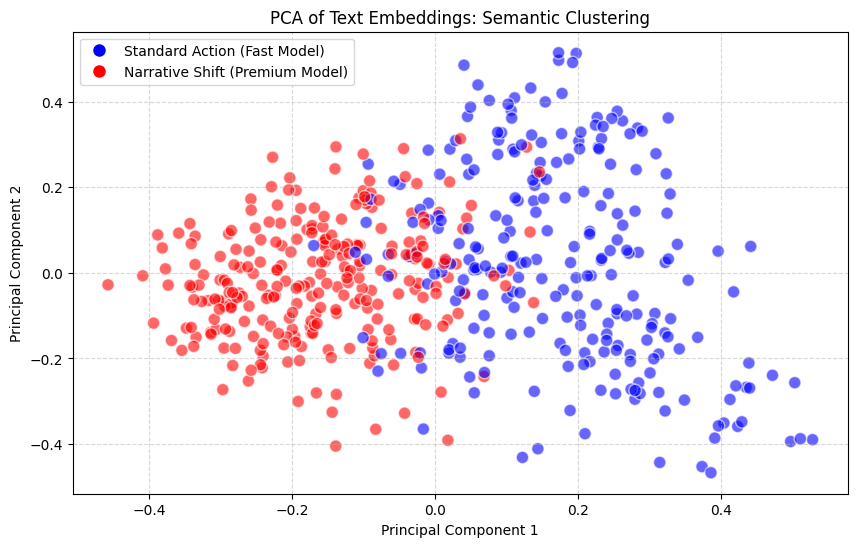

Notice how clearly the two intents separate in vector space. This is why a simple Linear SVM is highly accurate and incredibly fast.


In [2]:
# Use PCA to reduce the 384-dimensional embeddings down to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6, edgecolors='w', s=80)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Standard Action (Fast Model)', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Narrative Shift (Premium Model)', markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements, loc='best')

plt.title("PCA of Text Embeddings: Semantic Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Notice how clearly the two intents separate in vector space. This is why a simple Linear SVM is highly accurate and incredibly fast.")

In [4]:
# You can change this text and rerun the cell to test the engine live!
test_prompt = "I want to invent a new religion based on the moon and convert my empire."

# Execute routing logic
vector = embedder.encode([test_prompt])
prediction = classifier.predict(vector)[0]

print(f"User Prompt: '{test_prompt}'\n")
if prediction == "standard_action":
    print("Routing Decision: Standard Action")
    print("Target: Llama-3-8B (Local)")
    print("Estimated Cost: $0.20 / 1M tokens")
else:
    print("Routing Decision: Narrative Shift")
    print("Target: Claude-3.5-Sonnet (API)")
    print("Estimated Cost: $3.00 / 1M tokens")

User Prompt: 'I want to invent a new religion based on the moon and convert my empire.'

Routing Decision: Narrative Shift
Target: Claude-3.5-Sonnet (API)
Estimated Cost: $3.00 / 1M tokens
